In [16]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 1. データ読み込み
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
print("\nデータの情報:")
print(df.info())

print("\nデータサイズ")
print(df.shape)

print("\n欠損値の確認:")
print(df.isnull().sum())


データの情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

データサイズ
(150, 4)

欠損値の確認:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [19]:
df_answer = pd.DataFrame(data=iris.target, columns=['species'])
df_answer.shape

(150, 1)

In [20]:
pd.concat([df, df_answer], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


c:\Users\yusuke.kuribayashi\AppData\Local\miniconda3\envs\dsb_code\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yusuke.kuribayashi\AppData\Local\miniconda3\envs\dsb_code\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\yusuke.kuribayashi\AppData\Local\miniconda3\envs\dsb_code\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yusuke.kuribayashi\A

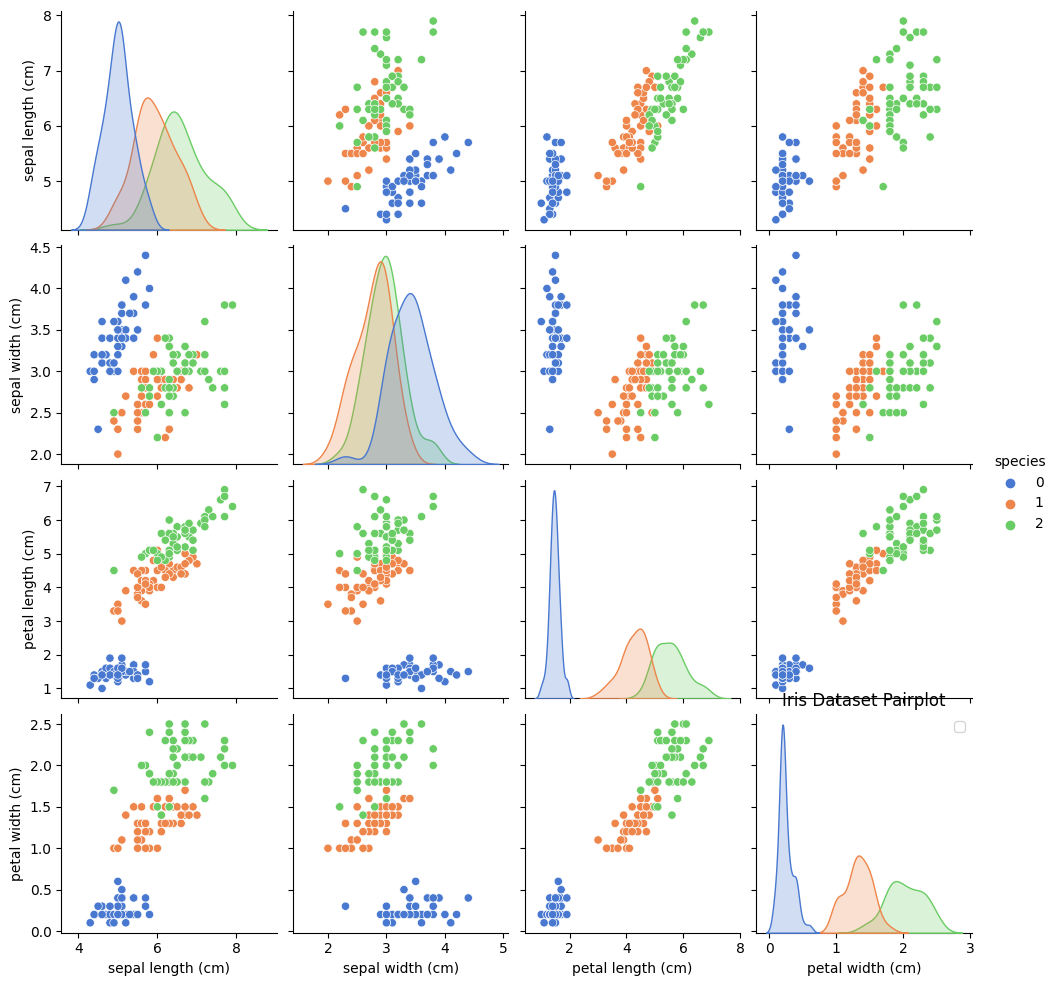

In [21]:
sns.pairplot(pd.concat([df, df_answer], axis=1), diag_kind='kde', hue='species', palette='muted')
plt.legend()
plt.title('Iris Dataset Pairplot');

In [22]:
# 特徴量を標準化する
from sklearn.preprocessing import StandardScaler    
SDscaler = StandardScaler()
df_scaled = SDscaler.fit_transform(df) # numpy配列に変換される

# 標準化したデータをDataFrameに変換
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print("\n標準化後のデータ:")   
print(df_scaled.head())


標準化後のデータ:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [23]:
# 各特徴量同士の共分散行列を作成する
cov_matrix = df_scaled.cov()
print("\n共分散行列:")  
print(cov_matrix)


共分散行列:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.006711         -0.118359           0.877604   
sepal width (cm)           -0.118359          1.006711          -0.431316   
petal length (cm)           0.877604         -0.431316           1.006711   
petal width (cm)            0.823431         -0.368583           0.969328   

                   petal width (cm)  
sepal length (cm)          0.823431  
sepal width (cm)          -0.368583  
petal length (cm)          0.969328  
petal width (cm)           1.006711  


In [24]:
# 固有ベクトルを計算し、大きい順に並べる
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\n固有値:")
print(eigenvalues)
print("\n固有ベクトル:")
print(eigenvectors)

# 固有値の大きい順にインデックスを取得
sorted_indices = np.argsort(eigenvalues)[::-1]
# 固有値と固有ベクトルを大きい順に並べる
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("\n固有値の大きい順:")
print(sorted_eigenvalues)
print("\n固有ベクトルの大きい順:")
print(sorted_eigenvectors)


固有値:
[2.93808505 0.9201649  0.14774182 0.02085386]

固有ベクトル:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

固有値の大きい順:
[2.93808505 0.9201649  0.14774182 0.02085386]

固有ベクトルの大きい順:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [25]:
# 主成分を計算する
pca_components = np.dot(df_scaled, sorted_eigenvectors)
print("\n主成分:")
print(pca_components[:5])  # 最初の5行を表示


主成分:
[[-2.26470281 -0.4800266  -0.12770602  0.0241682 ]
 [-2.08096115  0.67413356 -0.23460885  0.10300677]
 [-2.36422905  0.34190802  0.04420148  0.02837705]
 [-2.29938422  0.59739451  0.09129011 -0.06595556]
 [-2.38984217 -0.64683538  0.0157382  -0.03592281]]


In [26]:
# 参考までにsklearnのPCAを使ってみる
from sklearn.decomposition import PCA
pca = PCA(n_components=4)  # 主成分数を2に設定
pca_result = pca.fit_transform(df_scaled)
print("\nsklearnのPCA結果:")
print(pca_result[:5])  # 最初の5行を表示


sklearnのPCA結果:
[[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]


In [27]:
# 主成分の寄与率を計算する
contribution_rate = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print("\n主成分の寄与率:")
print(contribution_rate)


主成分の寄与率:
[0.72962445 0.22850762 0.03668922 0.00517871]


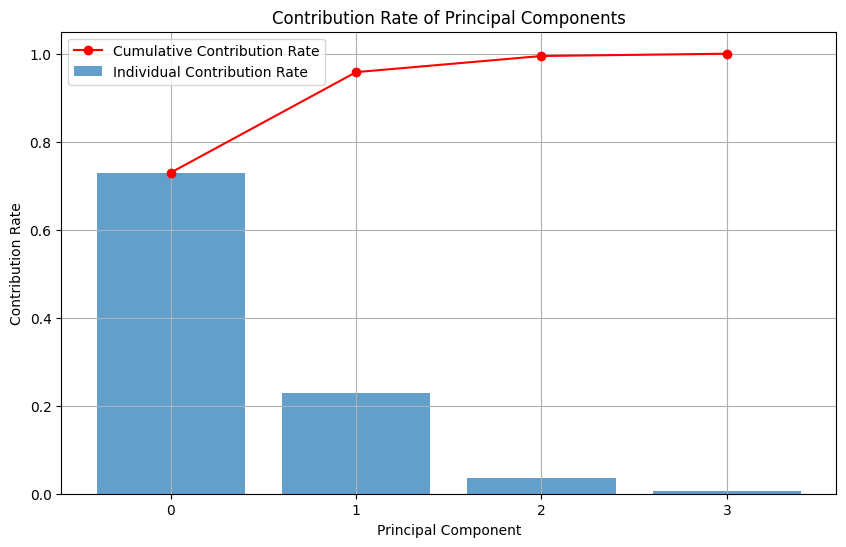

In [28]:
# 寄与率と累積寄与率をプロットする
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, len(contribution_rate)), contribution_rate, alpha=0.7, label='Individual Contribution Rate')
plt.plot(np.arange(0, len(contribution_rate)), np.cumsum(contribution_rate), marker='o', color='red', label='Cumulative Contribution Rate')
plt.xlabel('Principal Component')
plt.ylabel('Contribution Rate')
plt.title('Contribution Rate of Principal Components')
plt.xticks(np.arange(0, len(contribution_rate)))
plt.legend()
plt.grid()
plt.show()

c:\Users\yusuke.kuribayashi\AppData\Local\miniconda3\envs\dsb_code\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yusuke.kuribayashi\AppData\Local\Temp\ipykernel_1372\821379409.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


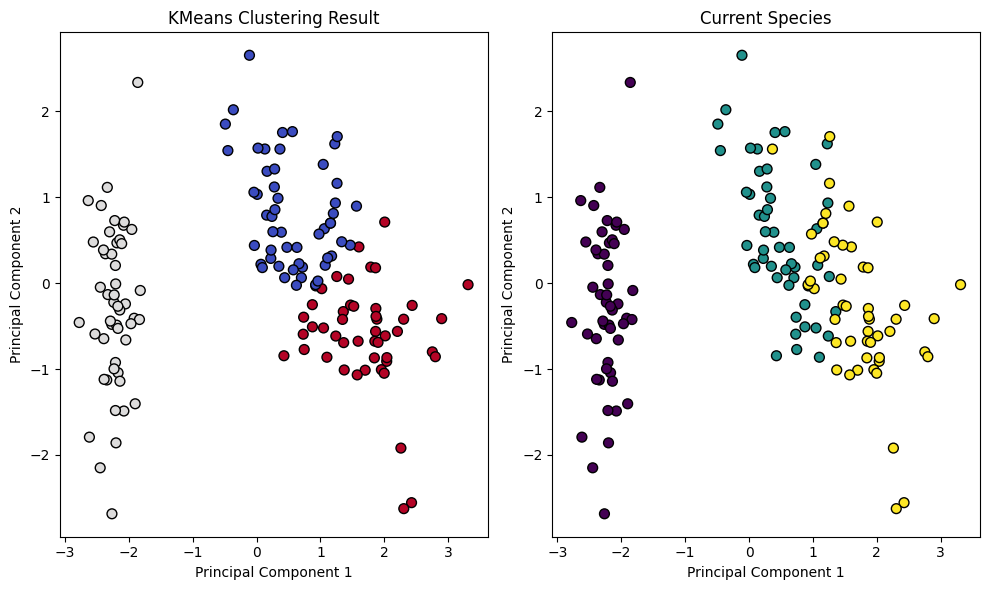

In [29]:
# 主成分分析を基に、クラスタリングを行う
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_components[:, :2])

# クラスタリング結果をプロットする
fig, ax = plt.subplots(figsize=(10, 6))

ax1 = plt.subplot(121)
# クラスタリング結果をプロット
ax1.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_, cmap='coolwarm', edgecolor='k', s=50)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('KMeans Clustering Result')
ax2 = plt.subplot(122)
# 正解データをプロット
ax2.scatter(pca_components[:, 0], pca_components[:, 1], c=iris.target, cmap='viridis', edgecolor='k', s=50)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('Current Species')
plt.tight_layout()
plt.show();